In [ ]:
!pip install lightgbm

In [1]:
import numpy as np 
import pandas as pd
import plotly as py
from statistics import mean
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.ensemble import VotingClassifier

import optuna

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
#########################################################
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('sample_solution.csv')

# Basic information

In [2]:
train.head(3)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.0,1.5397,135.3200,-1.4965,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.7505,18509.0,146820.0,-0.000276,1.090600e+16,1705.40,414.29,3.5392,1888.0,0.968930,18.3880,-0.001583,7.7059,5.9325,0.025693,4.5604,0.61122,10.7950,0.341930,0.23501,NaN,5237.70,1.29610,163.66,0.40378,0.188600,-0.001446,-0.35416,6.6432,0.30534,0.514020,1.907300e+09,29.861,0.96501,1797.2,72.178,108.6200,1.9799,1.2907,0.99519,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,43956.0,1978.2,5.5084,-0.001081,6.1244,1.231800e+11,275.920,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.6074,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.1157,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.0,1.3951,125.8100,1.1989,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.5033,238000.0,21440.0,-0.001344,3.079400e+16,229.10,844.82,1.4680,4726.5,0.915380,-1.5321,0.982600,7.1112,2.0797,0.042321,4.2523,0.41871,5.4499,0.012737,0.38647,7.3082,283.21,-0.92552,140.80,0.24739,-0.001656,-0.000975,-0.22629,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.26265,4455.0,78.339,745.5100,2.9069,1.4826,1.00510,1.4974,84.446,3.505600e+15,2.242300e+09,0.896300,4.6749,17713.0,9003.1,-4.3546,0.254100,6.9191,1.832400e+11,9.651,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.1890,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.1420,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.7,2.0054,1.6826,1.1968,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.1318,27940.0,862460.0,-0.002207,5.849100e+13,-897.84,NaN,1.3561,3063.4,0.086232,16.1060,0.001481,11.4760,5.3430,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.33770,-1.0732,4097.00,13.45800,159.24,0.32230,0.560090,0.000455,-0.16083,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.11549,14605.0,36.992,-9.6391,64.2670,NaN,0.99278,2.5891,430.400,-4.453500e+13,5.144900e+12,0.099591,6.5516,1887.5,43319.0,4.3931,0.260260,6.1052,1.013300e+11,357.270,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.1079,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.1312,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1


In [3]:
test.head(3)

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.16585,0.48705,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,6221.00,1.17200,5.175000e+09,0.25831,3.42050,0.044983,1001.600,10.1040,10.5360,19.517,-1.1209,1577.6,2.1847,96.109,1.1535,95.865,2.847100e+12,9.642100e+10,6406000.0,0.00299,6.6353,-0.015913,21723.0,67604.0,-0.000227,6.046200e+16,203.580,301.790,1.3461,5524.6,-0.003163,21.883,0.027383,7.2113,24.8250,-0.001420,4.8950,-1.08710,7.0561,-1.0615,0.00010,1.856,449.99,-0.36286,160.63,0.24801,0.62300,0.000116,-0.39384,1.9038,0.068588,0.020439,2.506500e+09,48.164,-0.002272,78643.0,112.360,1021.900,11.481,1.1573,0.002995,1.8192,1096.80,3.004100e+14,2.042300e+09,0.085500,4.6312,1683.10,9833.6,NaN,0.510410,4.0322,2.477900e+11,69.264,5494800.0,1239.00,5.349300e+08,5.3086,182.59,829.17,5.2319,0.010301,3640.80,112.12,-0.43442,11.16100,3755.7,0.99926,5.338200e+10,1.3867,-0.001878,58.7940,75657.0,187.24,1258.90,0.16334,0.055398,0.020002,795640000.0,0.16253,-22.1890,2.0655,0.43088,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.12965,0.37348,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,934.43,1.89790,4.905100e+09,0.28471,2.13870,-0.034328,35.223,6.5873,12.7340,29.590,4.1639,31915.0,3.1158,109.430,-0.8522,991.370,4.700100e+09,1.618200e+12,967810.0,1.02150,2.9617,0.810310,415570.0,384720.0,0.002243,6.712900e+15,228.590,33.952,1.4938,2067.5,-0.002343,32.772,0.092283,6.5363,2.0773,0.046237,4.4590,-0.84092,4.4473,-1.0012,0.00375,99.647,8146.80,22.50400,153.40,0.43076,0.74301,-0.000047,-0.11692,1.6544,0.467440,0.129650,4.442800e+08,38.506,0.396220,74296.0,93.629,-15.691,30.655,1.2311,1.004400,2.2484,780.87,1.213600e+14,3.488200e+11,-0.000792,6.9993,2451.60,10483.0,-5.3544,0.067286,5.4044,2.462600e+11,810.300,860670.0,2165.20,2.711500e+08,10.2320,515.41,262.71,5.6357,0.374220,420.16,116.23,1.26980,0.78619,1207.0,1.00070,2.065000e+13,1.2888,0.248850,9.9857,16323.0,244.46,647.58,0.25382,0.008800,0.018479,112060000.0,0.81528,-1.6342,1.5736,-1.07120,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.12019,0.44521,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,131.81,-0.48404,3.800000e+06,0.37173,0.40245,0.015119,1991.600,6.0050,0.9919,11.949,888.0700,887.7,3.5237,108.140,-1.6542,528.140,2.463600e+12,9.005900e+09,7259.3,1.00740,2.6123,1.062500,-208010.0,65708.0,0.001391,8.129800e+13,-84.032,NaN,1.7556,4729.2,0.003527,861.660,0.902670,9.3934,58.7850,0.007244,5.6645,-0.62747,6.5806,-1.1282,0.38650,56.547,125.36,12.70300,147.38,0.41437,0.51998,0.000857,-0.12065,5.4115,0.772530,0.128850,5.664900e+09,50.894,0.378710,80045.0,65.224,780.210,14.125,1.1657,-0.001285,1.0663,432.01,-5.953100e+11,1.383400e+12,-0.006236,5.6052,866.39,1065.2,-1.4805,0.064203,3.0197,1.684400e+11,212.830,7891000.0,277.16,4.047900e+10,1.1170,393.51,8859.10,8.8098,0.405350,393.65,305.14,1.32660,30.85200,2803.7,0.99925,4.722600e+12,1.5003,0.493380,37.0470,139070.0,2464.00,4724.80,0.29916,0.093046,0.018516,65193000.0,0.81831,-32.7800,2.1364,-1.93120,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797


In [4]:
cols = train.drop(['id', 'claim'], axis = 1).columns.tolist()
def info(data):
    
    print(f'Length of data: {len(data)}')
    
    print('')
    
    x = pd.Series([])
    for i in data.columns.tolist():
        x = x.append(pd.Series([data[i].dtypes]))
    
    print(x.value_counts().to_frame().reset_index().rename(columns={0: 'count', 'index': 'type'}))
    
    print('')
    
    flag = True
    for i in cols:
        if data[i].isna().sum() == 0:
            flag = False
            break
            
    print(f'All features have missing values: {flag}')
    
    list_na = []
    for i in cols:
        list_na.append(data[i].isna().sum())
    print(f'Mean of missing values is {mean(list_na)} ({round((mean(list_na)/len(data)) * 100,2)}%)')
    print(f'Max of missing values has {cols[list_na.index(max(list_na))]}: {max(list_na)} ({round((max(list_na)/len(data)) * 100,2)}%)')
    print(f'Min of missing values has {cols[list_na.index(min(list_na))]}: {min(list_na)} ({round((min(list_na)/len(data)) * 100,2)}%)')

print('TRAINING DATASET INFORMATION')
print('')
info(train)
print('---------------------------------------------')
print('TEST DATASET INFORMATION')
print('')
info(test)

TRAINING DATASET INFORMATION

Length of data: 957919

      type  count
0  float64    118
1    int64      2

All features have missing values: True
Mean of missing values is 15430 (1.61%)
Max of missing values has f31: 15678 (1.64%)
Min of missing values has f102: 15168 (1.58%)
---------------------------------------------
TEST DATASET INFORMATION

Length of data: 493474

      type  count
0  float64    118
1    int64      1

All features have missing values: True
Mean of missing values is 7934 (1.61%)
Max of missing values has f64: 8141 (1.65%)
Min of missing values has f4: 7733 (1.57%)


# EDA

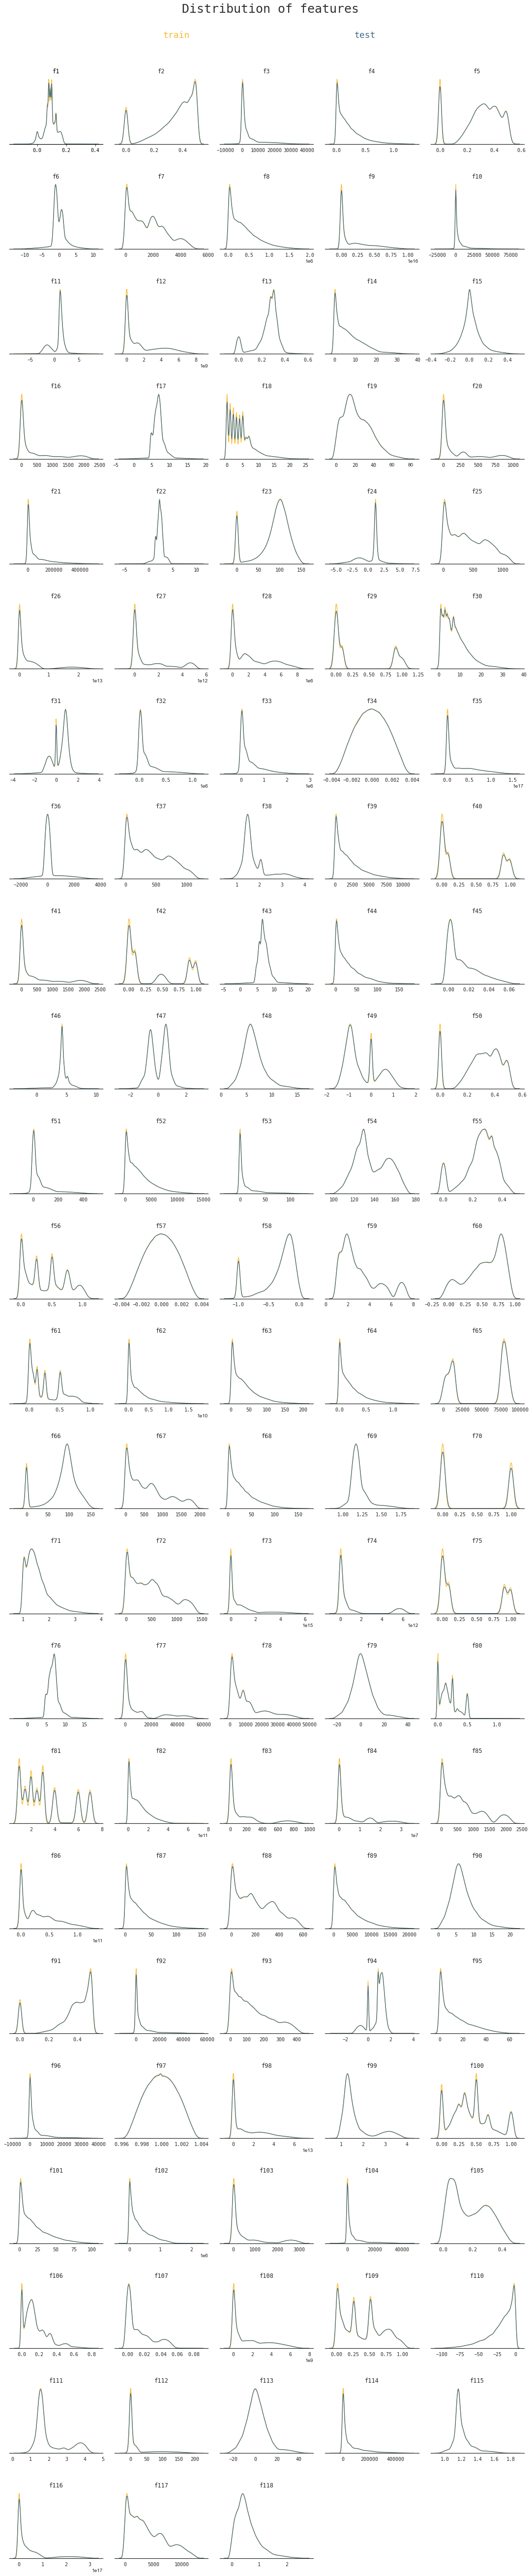

In [5]:
fig = plt.figure(figsize = (15, 71))
cols = train.columns.tolist()[1:119]
for i in cols:
    plt.subplot(24,5,cols.index(i)+1)
    sns.set_style("white")
    plt.title(i, size = 12, fontname = 'monospace')
    a = sns.kdeplot(train[i], color = '#f9ba32', linewidth = 1.3)
    sns.kdeplot(test[i], color = '#426e86', linewidth = 1.3)
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks(fontname = 'monospace')
    plt.yticks([])
    for j in ['right', 'left', 'top']:
        a.spines[j].set_visible(False)
        a.spines['bottom'].set_linewidth(1.2)
        
fig.tight_layout(h_pad = 3)

plt.figtext(0.335, 1.02, 'Distribution of features', color = '#2f3131', fontname = 'monospace', size = 25)
plt.figtext(0.3, 1.01, 'train', color = '#f9ba32', fontname = 'monospace', size = 18)
plt.figtext(0.66, 1.01, 'test', color = '#426e86', fontname = 'monospace', size = 18)

plt.show()

In [6]:
retarget = {0: 'No claim', 1: 'Claim'}
train['claim'] = train['claim'].map(retarget)

fig = px.pie(train['claim'].value_counts().reset_index(), values = 'claim', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#f9ba32','#426e86'], line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Distribution of the target', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = '#283655')],
                  showlegend = False)
                  
fig.show()

retarget = {'No claim': 0, 'Claim': 1}
train['claim'] = train['claim'].map(retarget)

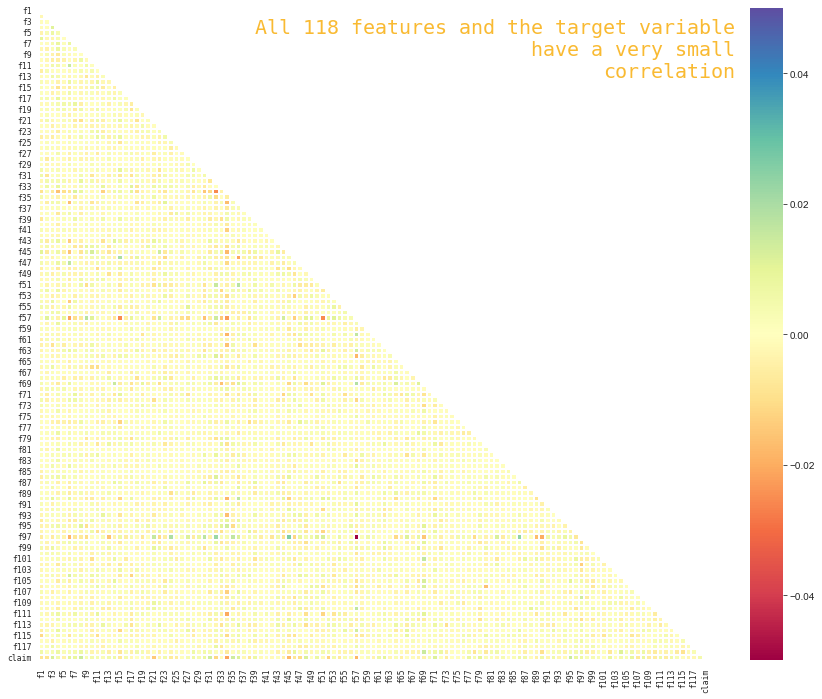

In [7]:
matrix = np.triu(train.drop('id', axis = 1).corr())
plt.figure(figsize = (15, 12))
sns.heatmap(train.drop('id', axis = 1).corr(), annot = False, cmap = 'Spectral', mask = matrix, vmin = -0.05, vmax = 0.05, linewidths = 0.1, linecolor = 'white', cbar = True)
plt.xticks(size = 8, fontname = 'monospace')
plt.yticks(size = 8, fontname = 'monospace')
plt.figtext(0.77, 0.8, '''All 118 features and the target variable
have a very small
correlation''', fontsize = 20, fontname = 'monospace', ha = 'right', color = '#f9ba32')
plt.show()

In [8]:
corr = train.drop('id', axis = 1).corr()['claim'].reset_index().drop(index=[118])
min_corr = corr.min()[1]
max_corr = corr.max()[1]
corr.query("claim == @min_corr | claim == @max_corr").rename(columns = {'index': 'feature'}).rename(index = {33: 'max_neg_correlation', 94: 'max_pos_correlation'})

,feature,claim
max_neg_correlation,f34,-0.021505
max_pos_correlation,f95,0.014771


# Preprocessing

In [9]:
features = train.columns.tolist()[1:119]

train['n_missing'] = train[features].isna().sum(axis = 1)
test['n_missing'] = test[features].isna().sum(axis = 1)

train['std'] = train[features].std(axis = 1)
test['std'] = test[features].std(axis = 1)

features += ['n_missing', 'std']

imputer = SimpleImputer(strategy = 'mean')
for i in features:
    train[i] = imputer.fit_transform(np.array(train[i]).reshape(-1,1))
    test[i] = imputer.transform(np.array(test[i]).reshape(-1,1))

sc = StandardScaler()
train[features] = sc.fit_transform(train[features])
test[features] = sc.transform(test[features])

X = train.drop(['id', 'claim'], axis = 1)
y = train['claim']
test.drop('id', axis = 1, inplace = True)

Memory optimization. It would be nice to convert the data to float16, but the XGB for some reason does not support this format. The function is taken from [here](https://www.kaggle.com/rinnqd/reduce-memory-usage)

In [10]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [11]:
reduce_mem_usage(train)

Memory usage after optimization is: 443.07 MB
Decreased by 50.3%


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim,n_missing,std
0,0,0.425521,-2.354802,-0.645267,-0.872248,-0.109034,-4.832443,-1.173641,-0.607806,-0.607291,-0.524322,-8.811135e-02,-0.199817,0.245589,0.373966,-6.897361e-01,2.384950,1.022751,-0.111502,3.048923e-01,-7.353195e-01,-0.562196,-0.821191,1.299691e+00,-1.127358,0.080368,-0.140800,-0.768344,0.311494,-0.761283,0.924066,0.459428,-0.574056,-4.599712e-01,-0.178609,-0.493938,2.183414,2.632247e-02,3.030463,-0.047909,1.391048,-0.695735,-0.893665,0.417841,-8.348489e-01,0.841840,0.250110,0.866928,2.112495,1.061015,-0.447868,8.123433e-17,1.019776,-0.507918,1.651995,1.403339e+00,-0.692749,-0.967461,-0.089001,2.084214,-0.914269,0.946379,-0.195131,-0.202632,3.369421,-1.289060,-0.333683,-9.550506e-01,-0.995836,6.100367e-01,1.178471,-0.506656,0.919054,-0.015633,-0.514450,-0.837400,0.063305,2.217819,-8.272315e-01,4.388798e-01,-1.212702,1.459495,0.181329,0.544500,-0.094305,1.846581,0.581762,1.061352,-1.334784,0.874964,-9.088138e-01,-2.563886,0.045872,0.315351,1.112310e+00,-0.985697,0.613737,-2.200828e+00,-0.863072,0.792982,1.806768,-1.005312,-0.698200,-0.615063,0.658667,8.991066e-01,-0.448565,-0.813806,-0.139452,-0.973100,0.417737,-0.367275,-0.486045,-8.857121e-01,-0.641030,0.006354,-0.627602,-1.219964e+00,1.131458,1,-0.444420,-0.774307
1,1,0.247576,-0.319490,1.218349,0.357183,1.073953,-0.363575,0.079829,-0.751072,0.892730,0.463570,3.234240e-01,0.706636,0.384224,-1.067497,-3.889705e-01,-0.693882,-0.414440,-0.891973,-1.228878e+00,-6.167246e-01,0.701764,-0.983877,1.043008e+00,0.526130,-0.891983,-0.600871,-0.745117,-0.303170,-0.764135,-0.810438,1.430149,0.512518,-7.331837e-01,-0.880428,0.086740,0.062654,1.405417e+00,-0.514778,1.413190,1.268842,-0.728095,1.541665,0.090567,-9.698291e-01,1.985527,-0.022390,0.580171,-0.444420,0.605827,0.597313,-5.639831e-01,-0.958049,-0.611364,0.215356,-2.970057e-02,-1.285184,-0.654634,0.369025,-0.368256,0.836468,-1.029660,-0.231105,0.806691,0.223047,-1.214643,-0.161295,2.626075e-01,-0.961674,2.106213e+00,1.198717,-0.108247,-1.058858,2.292536,-0.534097,1.177461,-1.298848,0.466559,-1.473708e-01,-6.561045e-01,0.371681,1.861662,0.793202,-0.633566,-0.700896,1.460573,-0.312338,0.691178,-0.010011,0.139896,2.123953e+00,0.700136,-0.492106,-0.449142,5.203685e-01,1.300192,0.547152,-1.195791e+00,2.127536,-0.583856,-1.517046,-0.766634,-0.968213,-0.374430,-0.577482,1.326577e+00,-0.124321,2.175087,0.124326,1.955413,-1.998586,2.356591,-0.520582,2.391237e-01,-0.678828,0.329100,-0.527058,-6.702443e-01,-0.680399,0,-0.937798,-0.458325
2,2,2.032347,-2.432645,-0.496795,0.336498,1.072427,0.116178,0.534916,-0.048196,-0.774348,1.051612,-2.345071e-01,-0.291321,0.102769,-0.691703,-3.433324e-17,-0.667391,0.384156,-0.645122,-1.414353e+00,2.202700e+00,-0.718254,-0.297242,-2.307289e+00,0.524842,-1.089976,-0.608329,-0.734593,-0.982652,-0.771806,0.024040,0.951107,-0.527369,1.099462e+00,-1.447375,-0.810657,-1.556237,-1.820836e-16,-0.706316,0.557120,-0.623352,-0.699442,-0.886083,2.492596,-8.555017e-01,-0.088833,-0.155500,-1.358371,0.834205,-0.347473,0.260766,-6.598052e-01,0.564411,0.058380,1.374219,6.567179e-01,0.464026,0.294312,0.603500,0.300700,0.228876,-0.964024,-0.674383,-0.650223,-0.436188,-0.930448,-1.318202,-1.181148e+00,1.299622,6.924812e-15,1.173548,2.382839,-0.137776,-0.711673,2.052909,-0.627607,-0.191531,-0.589516,3.173677e+00,3.150599e-01,0.409928,1.449779,-0.041271,0.904420,-0.534890,-0.940755,-1.025168,-0.959414,1.173222,-0.239667,-8.504614e-16,0.880273,-0.577164,0.057305,4.056303e-01,-0.965585,-0.595346,-2.187872e-13,-0.777164,2.524791,0.480235,

In [12]:
reduce_mem_usage(X)

Memory usage after optimization is: 438.50 MB
Decreased by 50.0%


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,n_missing,std
0,0.425521,-2.354802,-0.645267,-0.872248,-0.109034,-4.832443,-1.173641,-0.607806,-0.607291,-0.524322,-8.811135e-02,-0.199817,0.245589,0.373966,-6.897361e-01,2.384950,1.022751,-0.111502,3.048923e-01,-7.353195e-01,-0.562196,-0.821191,1.299691e+00,-1.127358,0.080368,-0.140800,-0.768344,0.311494,-0.761283,0.924066,0.459428,-0.574056,-4.599712e-01,-0.178609,-0.493938,2.183414,2.632247e-02,3.030463,-0.047909,1.391048,-0.695735,-0.893665,0.417841,-8.348489e-01,0.841840,0.250110,0.866928,2.112495,1.061015,-0.447868,8.123433e-17,1.019776,-0.507918,1.651995,1.403339e+00,-0.692749,-0.967461,-0.089001,2.084214,-0.914269,0.946379,-0.195131,-0.202632,3.369421,-1.289060,-0.333683,-9.550506e-01,-0.995836,6.100367e-01,1.178471,-0.506656,0.919054,-0.015633,-0.514450,-0.837400,0.063305,2.217819,-8.272315e-01,4.388798e-01,-1.212702,1.459495,0.181329,0.544500,-0.094305,1.846581,0.581762,1.061352,-1.334784,0.874964,-9.088138e-01,-2.563886,0.045872,0.315351,1.112310e+00,-0.985697,0.613737,-2.200828e+00,-0.863072,0.792982,1.806768,-1.005312,-0.698200,-0.615063,0.658667,8.991066e-01,-0.448565,-0.813806,-0.139452,-0.973100,0.417737,-0.367275,-0.486045,-8.857121e-01,-0.641030,0.006354,-0.627602,-1.219964e+00,1.131458,-0.444420,-0.774307
1,0.247576,-0.319490,1.218349,0.357183,1.073953,-0.363575,0.079829,-0.751072,0.892730,0.463570,3.234240e-01,0.706636,0.384224,-1.067497,-3.889705e-01,-0.693882,-0.414440,-0.891973,-1.228878e+00,-6.167246e-01,0.701764,-0.983877,1.043008e+00,0.526130,-0.891983,-0.600871,-0.745117,-0.303170,-0.764135,-0.810438,1.430149,0.512518,-7.331837e-01,-0.880428,0.086740,0.062654,1.405417e+00,-0.514778,1.413190,1.268842,-0.728095,1.541665,0.090567,-9.698291e-01,1.985527,-0.022390,0.580171,-0.444420,0.605827,0.597313,-5.639831e-01,-0.958049,-0.611364,0.215356,-2.970057e-02,-1.285184,-0.654634,0.369025,-0.368256,0.836468,-1.029660,-0.231105,0.806691,0.223047,-1.214643,-0.161295,2.626075e-01,-0.961674,2.106213e+00,1.198717,-0.108247,-1.058858,2.292536,-0.534097,1.177461,-1.298848,0.466559,-1.473708e-01,-6.561045e-01,0.371681,1.861662,0.793202,-0.633566,-0.700896,1.460573,-0.312338,0.691178,-0.010011,0.139896,2.123953e+00,0.700136,-0.492106,-0.449142,5.203685e-01,1.300192,0.547152,-1.195791e+00,2.127536,-0.583856,-1.517046,-0.766634,-0.968213,-0.374430,-0.577482,1.326577e+00,-0.124321,2.175087,0.124326,1.955413,-1.998586,2.356591,-0.520582,2.391237e-01,-0.678828,0.329100,-0.527058,-6.702443e-01,-0.680399,-0.937798,-0.458325
2,2.032347,-2.432645,-0.496795,0.336498,1.072427,0.116178,0.534916,-0.048196,-0.774348,1.051612,-2.345071e-01,-0.291321,0.102769,-0.691703,-3.433324e-17,-0.667391,0.384156,-0.645122,-1.414353e+00,2.202700e+00,-0.718254,-0.297242,-2.307289e+00,0.524842,-1.089976,-0.608329,-0.734593,-0.982652,-0.771806,0.024040,0.951107,-0.527369,1.099462e+00,-1.447375,-0.810657,-1.556237,-1.820836e-16,-0.706316,0.557120,-0.623352,-0.699442,-0.886083,2.492596,-8.555017e-01,-0.088833,-0.155500,-1.358371,0.834205,-0.347473,0.260766,-6.598052e-01,0.564411,0.058380,1.374219,6.567179e-01,0.464026,0.294312,0.603500,0.300700,0.228876,-0.964024,-0.674383,-0.650223,-0.436188,-0.930448,-1.318202,-1.181148e+00,1.299622,6.924812e-15,1.173548,2.382839,-0.137776,-0.711673,2.052909,-0.627607,-0.191531,-0.589516,3.173677e+00,3.150599e-01,0.409928,1.449779,-0.041271,0.904420,-0.534890,-0.940755,-1.025168,-0.959414,1.173222,-0.239667,-8.504614e-16,0.880273,-0.577164,0.057305,4.056303e-01,-0.965585,-0.595346,-2.187872e-13,-0.777164,2.524791,0.480235,-0.826465,-0.695241

In [13]:
reduce_mem_usage(test)

Memory usage after optimization is: 225.89 MB
Decreased by 50.0%


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,n_missing,std
0,1.750504,0.972429,-0.435867,-8.450343e-01,0.098015,0.462064,-0.827510,-1.089804,-0.778466,0.089863,0.298280,1.579885,0.105161,-5.448081e-01,2.532229e-01,0.889142,1.887039,1.562600,-0.202302,-7.351075e-01,-0.667472,-0.095515,0.241355,0.498279,-1.021953,-0.094989,-0.710516,1.815425,-0.757661,-0.211671,-0.528846,-0.558145,-6.325889e-01,-0.145860,9.529696e-01,0.025994,-3.340430e-01,-0.723432,1.824007,-0.827359,-6.900570e-01,-0.821989,0.145654,-1.729629e-01,-1.023013,0.546048,-1.662840,3.239318e-01,-0.879565,-2.068910,-0.626317,-0.891470,-0.585165,1.461574,-0.024019,0.659920,0.069065,-0.231133,-0.671022,-1.803486,-0.994947,0.012936,0.329091,-0.963728,0.862581,0.790627,0.791032,-0.645694,-0.430036,-0.848579,0.626050,1.636476,-0.419773,-0.534198,-0.659533,-1.324633,-0.603156,-0.066996,-7.395377e-17,1.963075,0.400714,1.450816,-0.369818,-0.072884,1.043117,-1.050504,-0.843158,-0.157214,-8.492881e-01,-0.479296,-2.454528,-0.146867,-0.184528,-1.776404e+00,-0.155086,-0.014718,-0.466647,-0.866710,-0.419751,-1.520277,1.982556,-0.756367,-0.421658,-0.392424,-0.120069,-0.750625,0.359973,-0.470928,-0.798566,-0.122775,-0.010163,-5.187502e-01,-1.247941,2.012609e-01,-0.130463,-0.637536,-0.620380,-0.236190,-0.444420,-0.026091
1,0.912844,0.189654,-0.362325,2.503241e+00,0.191447,-0.565697,-0.588741,0.517164,-0.522539,-0.439426,0.787614,1.451855,0.368278,-7.399472e-01,-5.316296e-01,-0.654057,-0.179344,2.130864,0.492796,-7.161478e-01,-0.327106,0.952046,0.600899,-0.732113,1.845830,-0.601655,0.223412,-0.564030,1.609008,-0.835166,0.536552,1.391564,5.843071e-02,1.477124,-6.163658e-01,0.061922,-1.191995e+00,-0.470617,0.044487,-0.825488,-6.723679e-01,-0.661396,-0.225811,-9.699132e-01,2.254872,0.160427,-1.296137,-9.240295e-01,-0.796186,-2.043723,0.491700,2.181084,0.479593,1.007204,1.650563,1.033617,-0.038956,0.760784,-0.816009,-0.305438,-0.565404,-0.703152,0.048515,0.821403,0.740868,0.266526,-1.192719,0.060923,0.145357,1.197287,1.605416,0.795331,-0.571289,-0.359752,-0.855041,0.072628,-0.551872,-0.004148,-7.671017e-01,-0.788221,1.095131,1.435229,2.908781,-0.605709,2.643479,-1.059169,-0.648174,1.963659,-1.010948e+00,-0.350412,0.051409,-0.532112,-0.146879,6.346822e-01,-0.976133,-0.413837,0.479270,0.399028,-0.558369,-0.629090,-0.525599,-0.938859,-0.354899,-0.484808,0.619604,-1.082375,0.265540,-0.838315,1.409319,0.992586,-0.563783,-5.519723e-01,1.007486,2.940548e-01,-0.510216,0.016637,0.855994,-0.686174,-0.937798,-0.272707
2,0.693942,0.684049,-0.523668,-7.356771e-01,-0.061173,0.184243,0.820482,-0.175177,-0.607921,-0.519784,-0.818068,-0.873123,1.235566,-1.004271e+00,-4.230782e-02,2.470064,-0.521499,-0.904900,-0.724540,2.454944e+00,-0.675212,1.410965,0.566081,-1.224098,0.362373,-0.163349,-0.764164,-0.984314,1.576245,-0.894468,0.861746,-1.695421,-6.367204e-01,0.917010,-8.099915e-01,-0.387171,-1.820836e-16,-0.022497,1.414580,-0.812093,6.741602e-01,1.343881,1.346503,1.016803e+00,-0.427076,1.226635,-0.978188,9.646876e-02,-0.971794,0.597520,-0.001050,-1.021062,0.023225,0.628876,1.500378,0.339128,0.560855,0.747424,1.368169,0.840450,-0.568550,1.109663,0.408400,0.742963,0.901837,-0.528259,0.328950,-0.548255,-0.364544,-0.857323,-1.091948,-0.133489,-0.674491,0.160692,-0.867375,-0.749939,-0.657657,-0.915590,-3.370237e-01,-0.807363,-0.111673,0.642424,0.265368,0.202627,-0.618826,0.261642,-1.009160,1.186859,1.442339e+00,0.662692,0.265769,-0.535283,1.583596,7.150413e-01,1.403231,-0.163799,-0.473216,-0.579769,-0.258903,0.240064,0.865024,-0.561329,2.234665,0.131354,0.990258,-0.482595,0.267834,-0

# XGB

In [ ]:
def objective(trial, data = X, target = y):

    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 10000, 50000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 500),
        'gamma': trial.suggest_float('gamma', 0.0001, 1.0, log = True),
        'alpha': trial.suggest_float('alpha', 0.0001, 10.0, log = True),
        'lambda': trial.suggest_float('lambda', 0.0001, 10.0, log = True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.8),
        'subsample': trial.suggest_float('subsample', 0.1, 0.8),
        'tree_method': 'gpu_hist',
        'booster': 'gbtree',
        'random_state': 228,
        'use_label_encoder': False,
        'eval_metric': 'auc'
    }
    
    model = XGBClassifier(**params)
    scores = []
    k = StratifiedKFold(n_splits = 2, random_state = 228, shuffle = True)
    for i, (trn_idx, val_idx) in enumerate(k.split(X, y)):
        
        X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 300, verbose = False)
        
        tr_preds = model.predict_proba(X_train)[:,1]
        tr_score = roc_auc_score(y_train, tr_preds)
        
        val_preds = model.predict_proba(X_val)[:,1]
        val_score = roc_auc_score(y_val, val_preds)

        scores.append((tr_score, val_score))
        
        print(f"Fold {i+1} | AUC: {val_score}")
        
        
    scores = pd.DataFrame(scores, columns = ['train score', 'validation score'])
    
    return scores['validation score'].mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 300)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

[I 2021-09-08 14:04:03,413] A new study created in memory with name: no-name-644cf062-2d4f-438d-9b33-9c21eff30cad


Fold 1 | AUC: 0.8132948324538406


[I 2021-09-08 14:05:41,763] Trial 0 finished with value: 0.8130139842313704 and parameters: {'max_depth': 6, 'learning_rate': 0.07474318080104073, 'n_estimators': 38787, 'min_child_weight': 24, 'gamma': 0.023083197110495376, 'alpha': 0.01289292166916101, 'lambda': 4.810998008887541, 'colsample_bytree': 0.46333373161027314, 'subsample': 0.7584308654792628}. Best is trial 0 with value: 0.8130139842313704.


Fold 2 | AUC: 0.8127331360089002
Fold 1 | AUC: 0.814193927108254


[I 2021-09-08 14:17:17,221] Trial 1 finished with value: 0.8139475087091184 and parameters: {'max_depth': 2, 'learning_rate': 0.007501808276443299, 'n_estimators': 11308, 'min_child_weight': 255, 'gamma': 0.013482188105834347, 'alpha': 0.00026530705928270906, 'lambda': 3.9114096810276093, 'colsample_bytree': 0.11927306089368707, 'subsample': 0.35331273581947753}. Best is trial 1 with value: 0.8139475087091184.


Fold 2 | AUC: 0.8137010903099827
Fold 1 | AUC: 0.8123178878274775


[I 2021-09-08 14:18:30,447] Trial 2 finished with value: 0.8121832441557512 and parameters: {'max_depth': 5, 'learning_rate': 0.07920841760281708, 'n_estimators': 11471, 'min_child_weight': 131, 'gamma': 0.0023562429420471874, 'alpha': 0.0012480266415870272, 'lambda': 0.0003933476009108922, 'colsample_bytree': 0.5820480549293222, 'subsample': 0.29429084232927805}. Best is trial 1 with value: 0.8139475087091184.


Fold 2 | AUC: 0.8120486004840248
Fold 1 | AUC: 0.8147436619822861


[I 2021-09-08 14:21:08,306] Trial 3 finished with value: 0.814464656347849 and parameters: {'max_depth': 4, 'learning_rate': 0.053516900604797885, 'n_estimators': 42262, 'min_child_weight': 83, 'gamma': 0.01984722886125126, 'alpha': 0.44640015629968127, 'lambda': 0.10294882807796554, 'colsample_bytree': 0.5876718599245432, 'subsample': 0.7933405020059813}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8141856507134121
Fold 1 | AUC: 0.8142998511048544


[I 2021-09-08 14:23:30,103] Trial 4 finished with value: 0.8141573839557639 and parameters: {'max_depth': 4, 'learning_rate': 0.06825116839289994, 'n_estimators': 18425, 'min_child_weight': 482, 'gamma': 0.015057274295222675, 'alpha': 0.2563609377373884, 'lambda': 0.10897701106151511, 'colsample_bytree': 0.27135262208559885, 'subsample': 0.6344964984527577}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8140149168066733
Fold 1 | AUC: 0.8141111871141451


[I 2021-09-08 14:25:05,309] Trial 5 finished with value: 0.8139387379835432 and parameters: {'max_depth': 5, 'learning_rate': 0.09474047935705876, 'n_estimators': 43621, 'min_child_weight': 324, 'gamma': 0.0028387426912253183, 'alpha': 0.02196459994077175, 'lambda': 0.05189319398797908, 'colsample_bytree': 0.6776707497547735, 'subsample': 0.795982156873465}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8137662888529413
Fold 1 | AUC: 0.8137746601338758


[I 2021-09-08 14:28:39,304] Trial 6 finished with value: 0.8133509044024414 and parameters: {'max_depth': 2, 'learning_rate': 0.04233656003885345, 'n_estimators': 11666, 'min_child_weight': 492, 'gamma': 0.0010081436423660293, 'alpha': 0.6040605827989572, 'lambda': 1.6206626998333113, 'colsample_bytree': 0.293533383896204, 'subsample': 0.14320265316626352}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8129271486710071
Fold 1 | AUC: 0.814202361149097


[I 2021-09-08 14:30:43,830] Trial 7 finished with value: 0.8139907832981118 and parameters: {'max_depth': 3, 'learning_rate': 0.08891076063933608, 'n_estimators': 22322, 'min_child_weight': 140, 'gamma': 0.031740344043911795, 'alpha': 0.24403601197904887, 'lambda': 0.03828674134630596, 'colsample_bytree': 0.17443922380173543, 'subsample': 0.5163591855993589}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8137792054471266
Fold 1 | AUC: 0.8122381976161974


[I 2021-09-08 14:32:50,887] Trial 8 finished with value: 0.8119602883756767 and parameters: {'max_depth': 5, 'learning_rate': 0.037780326492397445, 'n_estimators': 24323, 'min_child_weight': 217, 'gamma': 0.1877156591286337, 'alpha': 0.007194369587582765, 'lambda': 3.659202058148378, 'colsample_bytree': 0.3955591130328683, 'subsample': 0.10526154242367641}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8116823791351558
Fold 1 | AUC: 0.8120810688878698


[I 2021-09-08 14:34:20,745] Trial 9 finished with value: 0.8118474860757046 and parameters: {'max_depth': 6, 'learning_rate': 0.07096924090197103, 'n_estimators': 37902, 'min_child_weight': 469, 'gamma': 0.305110407495144, 'alpha': 0.007261792414001189, 'lambda': 0.12791366662018544, 'colsample_bytree': 0.6556650152881005, 'subsample': 0.2178542519761687}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8116139032635394
Fold 1 | AUC: 0.8139110200321593


[I 2021-09-08 14:40:24,823] Trial 10 finished with value: 0.8137183467492923 and parameters: {'max_depth': 8, 'learning_rate': 0.021378471171426234, 'n_estimators': 48991, 'min_child_weight': 27, 'gamma': 0.00014300663689564554, 'alpha': 8.778820770769215, 'lambda': 0.0013514887067046244, 'colsample_bytree': 0.7573084437572721, 'subsample': 0.5625135633103325}. Best is trial 3 with value: 0.814464656347849.


Fold 2 | AUC: 0.8135256734664253
Fold 1 | AUC: 0.814782216223802


[I 2021-09-08 14:45:13,143] Trial 11 finished with value: 0.8145549298847671 and parameters: {'max_depth': 4, 'learning_rate': 0.05845161670978726, 'n_estimators': 30265, 'min_child_weight': 371, 'gamma': 0.0847711018179088, 'alpha': 0.35220888979421044, 'lambda': 0.0035197225463044737, 'colsample_bytree': 0.5053647526752804, 'subsample': 0.6613753575632356}. Best is trial 11 with value: 0.8145549298847671.


Fold 2 | AUC: 0.8143276435457322
Fold 1 | AUC: 0.8148572839885133


[I 2021-09-08 14:50:04,781] Trial 12 finished with value: 0.8146088207067895 and parameters: {'max_depth': 4, 'learning_rate': 0.05309484730095074, 'n_estimators': 32334, 'min_child_weight': 372, 'gamma': 0.09535660449428379, 'alpha': 1.9221325116685537, 'lambda': 0.004878231275831347, 'colsample_bytree': 0.5194443963792559, 'subsample': 0.6744035206012303}. Best is trial 12 with value: 0.8146088207067895.


Fold 2 | AUC: 0.8143603574250657
Fold 1 | AUC: 0.8150816932219395


[I 2021-09-08 14:55:38,438] Trial 13 finished with value: 0.814838333229956 and parameters: {'max_depth': 3, 'learning_rate': 0.056498317051155246, 'n_estimators': 31844, 'min_child_weight': 374, 'gamma': 0.986875167001872, 'alpha': 7.002875100746191, 'lambda': 0.002814106571593909, 'colsample_bytree': 0.46426672620134, 'subsample': 0.6734306739917854}. Best is trial 13 with value: 0.814838333229956.


Fold 2 | AUC: 0.8145949732379727
Fold 1 | AUC: 0.8149481557138764


[I 2021-09-08 15:00:14,678] Trial 14 finished with value: 0.8147349149451789 and parameters: {'max_depth': 3, 'learning_rate': 0.03671934827629343, 'n_estimators': 32670, 'min_child_weight': 386, 'gamma': 0.8146056031257788, 'alpha': 4.453369360369653, 'lambda': 0.005165170008521995, 'colsample_bytree': 0.38961404912810627, 'subsample': 0.41714936769814714}. Best is trial 13 with value: 0.814838333229956.


Fold 2 | AUC: 0.8145216741764815
Fold 1 | AUC: 0.8149111084082854


[I 2021-09-08 15:04:58,306] Trial 15 finished with value: 0.8147763760432775 and parameters: {'max_depth': 3, 'learning_rate': 0.0334158915121822, 'n_estimators': 34376, 'min_child_weight': 393, 'gamma': 0.8834267611588522, 'alpha': 5.734178066939944, 'lambda': 0.00011770585776644327, 'colsample_bytree': 0.3674522315183799, 'subsample': 0.4149160696831611}. Best is trial 13 with value: 0.814838333229956.


Fold 2 | AUC: 0.8146416436782695


In [ ]:
# Mean AUC on 2 folds - 0.81501
# esr - 300
paramsXGB = {'max_depth': 2, 'learning_rate': 0.021537077920105466, 'n_estimators': 10606, 'min_child_weight': 150, 'gamma': 0.11611920725914951, 'alpha': 0.0021839958087869794, 'lambda': 0.0018567979557499344, 'colsample_bytree': 0.7139742731494992, 'subsample': 0.6258627743440968,
             'tree_method': 'gpu_hist',
             'booster': 'gbtree',
             'random_state': 228,
             'use_label_encoder': False,
             'eval_metric': 'auc'}
# Solo result - 0.81762 on 5 folds

In [ ]:
folds = StratifiedKFold(n_splits = 5, random_state = 228, shuffle = True)
predictions = np.zeros(len(test))
for fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

    model = XGBClassifier(**paramsXGB)
   
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = False, early_stopping_rounds = 300)
    
    predictions += model.predict_proba(test)[:,1] / folds.n_splits 

In [ ]:
ss['claim'] = predictions
ss.to_csv('xgb1', index = False)

# CatBoost

In [ ]:
def objective(trial, data = X, target = y):
    
    params = {
        'depth': trial.suggest_int('depth', 2, 6),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2),
        'iterations': trial.suggest_int('iterations', 10000, 50000),
        'max_bin': trial.suggest_int('max_bin', 1, 300),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.0001, 1.0, log = True),
        'subsample': trial.suggest_float('subsample', 0.1, 0.8),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
        'bootstrap_type': 'Bernoulli',
        'random_seed': 228,
        'loss_function': 'Logloss',
        'eval_metric': 'AUC',
        'task_type': 'GPU'
    }
    
    model = CatBoostClassifier(**params)
    scores = []
    k = StratifiedKFold(n_splits = 2, random_state = 228, shuffle = True)
    for i, (trn_idx, val_idx) in enumerate(k.split(X, y)):
        
        X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 300, verbose = False)
        
        tr_preds = model.predict_proba(X_train)[:,1]
        tr_score = roc_auc_score(y_train, tr_preds)
        
        val_preds = model.predict_proba(X_val)[:,1]
        val_score = roc_auc_score(y_val, val_preds)

        scores.append((tr_score, val_score))
        
        print(f"Fold {i+1} | AUC: {val_score}")
        
        
    scores = pd.DataFrame(scores, columns = ['train score', 'validation score'])
    
    return scores['validation score'].mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 300)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

In [ ]:
# Mean AUC on 2 folds - 0.81495
# esr - 300
paramsCB = {'depth': 3, 'learning_rate': 0.014530866870832323, 'iterations': 44204, 'max_bin': 265, 'min_data_in_leaf': 14, 'l2_leaf_reg': 0.004427550682515904, 'subsample': 0.5402586792667279, 'grow_policy': 'SymmetricTree', 'leaf_estimation_method': 'Gradient',
            'bootstrap_type': 'Bernoulli',
            'random_seed': 228,
            'loss_function': 'Logloss',
            'eval_metric': 'AUC',
            'task_type': 'GPU' }
# Solo result - 0.81739

In [ ]:
folds = StratifiedKFold(n_splits = 5, random_state = 228, shuffle = True)
predictions = np.zeros(len(test))
for fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

    model = CatBoostClassifier(**paramsCB)
   
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = False, early_stopping_rounds = 300)
    
    predictions += model.predict_proba(test)[:,1] / folds.n_splits 

In [ ]:
ss['claim'] = predictions
ss.to_csv('cb1', index = False)

# LGBM

In [ ]:
def objective(trial, data = X, target = y):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1000, 15000),
        'max_depth': trial.suggest_int('max_depth', 2, 3),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 50, 500),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 200),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.8),
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'random_state': 228,
        'metric': 'auc',
        'device_type': 'gpu',
        'gpu_platform_id': 0,
        'gpu_device_id': 0
    }
    
    model = LGBMClassifier(**params)
    scores = []
    k = StratifiedKFold(n_splits = 2, random_state = 228, shuffle = True)
    for i, (trn_idx, val_idx) in enumerate(k.split(X, y)):
        
        X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 300, verbose = False)
        
        tr_preds = model.predict_proba(X_train)[:,1]
        tr_score = roc_auc_score(y_train, tr_preds)
        
        val_preds = model.predict_proba(X_val)[:,1]
        val_score = roc_auc_score(y_val, val_preds)

        scores.append((tr_score, val_score))
        
        print(f"Fold {i+1} | AUC: {val_score}")
        
        
    scores = pd.DataFrame(scores, columns = ['train score', 'validation score'])
    
    return scores['validation score'].mean()

study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best value:', study.best_value)

In [ ]:
# Mean AUC on 2 folds - 0.8151
paramsLGBM = {'n_estimators': 11990, 'max_depth': 3, 'learning_rate': 0.016501612373246877, 'reg_alpha': 7.555087388180319, 'reg_lambda': 0.9534606245427513, 'num_leaves': 155, 'min_data_per_group': 177, 'min_child_samples': 150, 'colsample_bytree': 0.22781593823447946,
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'random_state': 228,
            'metric': 'auc',
            'device_type': 'gpu',
            'gpu_platform_id': 0,
            'gpu_device_id': 0}
# Solo result - 0.81795

In [ ]:
folds = StratifiedKFold(n_splits = 5, random_state = 228, shuffle = True)
predictions = np.zeros(len(test))
for fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

    model = LGBMClassifier(**paramsLGBM)
   
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = False, early_stopping_rounds = 300)
    
    predictions += model.predict_proba(test)[:,1] / folds.n_splits 

In [ ]:
ss['claim'] = predictions
ss.to_csv('lgbm1', index = False)

# Voting time

In [ ]:
xgb_model = XGBClassifier(**paramsXGB)
cb_model = CatBoostClassifier(**paramsCB)
lgbm_model = LGBMClassifier(**paramsLGBM)

# XGB solo result - 0.81762
# CB solo result - 0.81739
# LGBM solo result - 0.81795

In [ ]:
folds = StratifiedKFold(n_splits = 5, random_state = 228, shuffle = True)

predictions = np.zeros(len(test))

for fold, (trn_idx, val_idx) in enumerate(folds.split(X, y)):
    
    X_train, X_val = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[trn_idx], y.iloc[val_idx]

    model = VotingClassifier(
            estimators = [
                ('xgb', xgb_model),
                ('cb', cb_model),
                ('lgbm', lgbm_model)       
            ],
            voting = 'soft',
            weights = [0.3, 0.2, 0.5],
            n_jobs = -1
        )
   
    model.fit(X_train, y_train)
    
    predictions += model.predict_proba(test)[:,1] / folds.n_splits
    
ss['claim'] = predictions

In [ ]:
ss.to_csv('voting!', index = False)

In [ ]:
ss